# 用 Python 画折线图

### 1. 初始设置

首先，导入所需的库，并设置中文字体和定义颜色等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import timedelta

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
colors = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
          '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
          '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 读取数据

其次，从 Excel 文件中读取随机模拟的数据，并定于画图用的数据。

In [2]:
# 数据源路径
filepath='./data/2019年9月每日销售.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath)

# 定义画图用的数据
x = [x.strftime('%m-%d') for x in df.日期]
y = df.实际销量

### 3. 开始画图

接下来，开始用「**面向对象**」的方法进行画图。

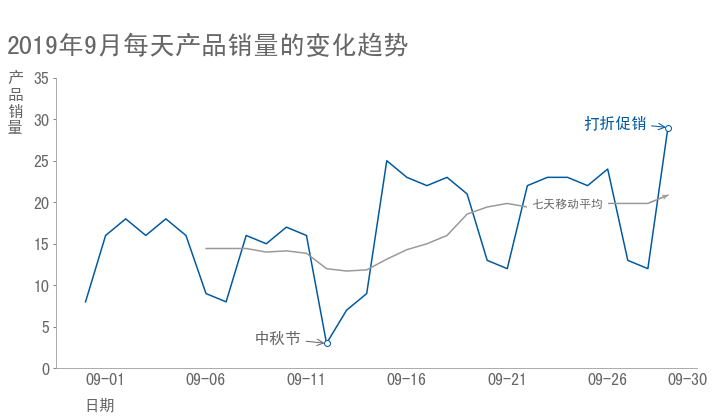

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax=plt.subplots(figsize=(10, 6))

# 设置标题
ax.text(-3.9, y.max()+6, '\n2019年9月每天产品销量的变化趋势\n', fontsize=26, color=colors['深灰色'])

# 绘制折线图
ax.plot(x, y, marker='o', color=colors['蓝色'], markevery=[y.idxmin(), y.idxmax()], mfc='w')

# 标注最大值对应的事件
ax.annotate('打折促销', xy=(x[y.idxmax()], y.max()), color=colors['蓝色'],
             xytext=(y.idxmax()-4.2, y.max()), 
             arrowprops=dict(arrowstyle='->', color=colors['蓝色']), fontsize=16)

# 标注最小值对应的事件
ax.annotate('中秋节', xy=(x[y.idxmin()], y.min()), color=colors['深灰色'],
             xytext=(y.idxmin()-3.6, y.min()), 
             arrowprops=dict(arrowstyle='->', color=colors['深灰色']), fontsize=16)

# 计算 7 天移动平均
y2 = y.rolling(7).mean()
# 绘制趋势线
ax.plot(x, y2, ls='-', color=colors['灰色'], label='七天移动平均')
# 绘制趋势线末端的箭头
plt.annotate('', xy=(x[-1:], y2[-1:]), xytext=(x[-2:-1], y2[-2:-1]), 
             arrowprops=dict(arrowstyle='->', color=colors['灰色'], shrinkB=0))
# 文字说明移动平均
ax.text(len(x)-7.8, y2[-8:-7], '七天移动平均', color=colors['深灰色'], fontsize=12, bbox=dict(facecolor='w', edgecolor='w'))

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(colors['灰色'])
ax.spines['left'].set_color(colors['灰色'])

# 隐藏 X 轴的刻度线
ax.tick_params(axis='x', which='major', length=0)

# 设置 X 轴显示的标签
xt = []
for i in np.arange(len(x)):
    if i % 5 == 0:
        xt.append(x[i])
    else:
        xt.append('')
xt[-1] = x[-1]
ax.set_xticklabels(xt, ha='left')

# 设置 X、Y 轴的标题，适当留白
ax.text(-0.1, -5, '日期', ha='left', fontsize=16, color=colors['深灰色'])
ax.text(-3.9, y.max()+6.8, '产\n品\n销\n量', va='top', fontsize=16, color=colors['深灰色'])

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=colors['深灰色'])

# 设置 y 轴的刻度范围
ax.set_ylim(0, y.max()+6)

plt.show()